# PRÁTICA GUIADA - Feature Engineering.

#### Estudamos as idéias fundamentais do aprendizado de máquina, mas todos os exemplos vistos assumiram que tínhamos dados numéricos em um formato `[n_samples, m_features]`. 

#### Em aplicações reais, os dados raramente são organizados dessa maneira. Com isso em mente, uma das etapas mais importantes para usar o aprendizado de máquina na prática é a ** engenharia de atributos ** ou [feature engineering](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114), ou seja, pegar todas as informações existentes sobre o problema a serem resolvidas e convertê-las em números que possam ser usados para criar uma variedade de recursos. 

#### Normalmente, esse processo é conhecido como ** vetorização **, pois envolve a idéia de converter dados arbitrários em vetores bem formados.

## Trabalhando com atributos categóricos.

#### Vamos imaginar que estamos explorando determinados dados de preços de propriedades e, junto com recursos numéricos, como preço e total de quartos, também temos informações sobre o bairro em que cada propriedade está localizada. Por exemplo, os dados podem ficar assim.

#### Vamos criar uma lista de dicionários com as chves `price`, `rooms` e `neighborhood` associadas aos seus respectivos valores `int` de preço, de quarto e `str`  para a vizinhança:

In [33]:
data = [{'price': 850000, 'rooms': 4, 'neighborhood': 'Moema'},
        {'price': 700000, 'rooms': 3, 'neighborhood': 'Ibirapuera'},
        {'price': 650000, 'rooms': 3, 'neighborhood': 'Sacomã'},
        {'price': 600000, 'rooms': 2, 'neighborhood': 'Mooca'}
       ]
data

[{'price': 850000, 'rooms': 4, 'neighborhood': 'Moema'},
 {'price': 700000, 'rooms': 3, 'neighborhood': 'Ibirapuera'},
 {'price': 650000, 'rooms': 3, 'neighborhood': 'Sacomã'},
 {'price': 600000, 'rooms': 2, 'neighborhood': 'Mooca'}]

####  <span style = "color:red">Código Original.</span>
<!---
data = [{'price': 850000, 'rooms': 4, 'neighborhood': 'Moema'},
        {'price': 700000, 'rooms': 3, 'neighborhood': 'Ibirapuera'},
        {'price': 650000, 'rooms': 3, 'neighborhood': 'Sacomã'},
        {'price': 600000, 'rooms': 2, 'neighborhood': 'Mooca'}]
-->

#### Usaremos a técnica [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), que cria colunas extras indicando a presença ou ausência de uma categoria com um valor de `1` ou `0`, respectivamente. Quando os dados aparecem como uma lista de dicionários, a classe [`sklearn.feature_extraction.DictVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) faz isso automaticamente.

#### Crie um objeto utilizando a função [`DictVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) para transformar a listas de mapeamentos de valores de recurso para vetores. Observe os parâmetros `sparse = False` e `dtype = Int`. 

#### Use a função [`.fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html#sklearn.feature_extraction.DictVectorizer.fit_transform) para que o algoritmo aprenda os nomes de recursos da lista criada.

In [34]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False,
                    dtype = int)
vec.fit_transform(data)
vec.get_feature_names()

['neighborhood=Ibirapuera',
 'neighborhood=Moema',
 'neighborhood=Mooca',
 'neighborhood=Sacomã',
 'price',
 'rooms']

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False, dtype = int)
print(vec.fit_transform(data))

X = vec.fit_transform(data)
print(vec.get_feature_names())
-->


#### Com os recursos categóricos codificados dessa maneira, podemos continuar como de costume para ajustar um modelo com o [Scikit-Learn](https://scikit-learn.org/stable/).

#### Para ver o significado de cada coluna, podemos inspecionar os nomes dos atributos com o método [`.get_feature_names()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html#sklearn.feature_extraction.DictVectorizer.get_feature_names), que retorna uma lista com os nomes dos atributos, ordenados por seus índices.

In [35]:
vec.get_feature_names()

['neighborhood=Ibirapuera',
 'neighborhood=Moema',
 'neighborhood=Mooca',
 'neighborhood=Sacomã',
 'price',
 'rooms']

####  <span style = "color:red">Código Original.</span>
<!---
vec.get_feature_names()
-->

#### Há uma desvantagem distinta nessa abordagem: se cada categoria tiver muitos valores possíveis, isso poderá aumentar bastante o tamanho do conjunto de dados. No entanto, como os dados codificados contêm principalmente `0` e `1`, uma ** matriz esparsa ** pode ser uma solução eficiente.

#### Repita a operação anterior com o parâmetro `sparse = True`

In [36]:
vec = DictVectorizer(sparse = True, 
                     dtype = int
                    )
vec.fit_transform(data)
print(vec.fit_transform(data))

  (0, 1)	1
  (0, 4)	850000
  (0, 5)	4
  (1, 0)	1
  (1, 4)	700000
  (1, 5)	3
  (2, 3)	1
  (2, 4)	650000
  (2, 5)	3
  (3, 2)	1
  (3, 4)	600000
  (3, 5)	2


####  <span style = "color:red">Código Original.</span>
<!---
vec = DictVectorizer(sparse = True, dtype = int)
vec.fit_transform(data)
print(vec.fit_transform(data))

#### Observe que a matriz esparsa armazena ** apenas valores diferentes de zero **: no nosso caso, de um total de 24 elementos (4 x 6), ele armazenou apenas 12. Isso torna o processamento muito mais eficiente. Muitos (mas não todos) dos estimadores do Scikit-Learn aceitam gráficos dispersos quando os modelos são ajustados e avaliados.
-->

#### Como alternativa, [`sklearn.preprocessing.OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) e [`sklearn.feature_extraction.FeatureHasher`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html) são duas funcionalidades adicionais que o Scikit-Learn inclui para oferecer suporte a esse tipo de codificação.

## Trabalhando com texto.

#### Outra necessidade comum na engenharia de recursos é converter texto em um conjunto de valores numéricos representativos. Por exemplo, a maioria das minerações automáticas de dados sociais é baseada em alguma forma de codificação de texto, como números. Um dos métodos mais simples é codificar os dados por meio da [contagem de palavras](https://scikit-learn.org/stable/modules/feature_extraction.html), que consiste em pegar cada fragmento de texto, contar as ocorrências de cada palavra e despejar os resultados em uma tabela.

#### Vamos criar uma lista de três frases.

In [37]:
textos = ['cientista de dados',
          'dados estruturados',
          'pensamento científico'
         ]

####  <span style = "color:red">Código Original.</span>
<!---
textos = ['cientista de dados',
          'dados estruturados',
          'pensamento científico']
-->

#### Para vetorizar esse conjunto de dados com base na contagem de palavras, podemos construir uma coluna representando cada palavra: "cientista", "dados", "pensamento" etc.

#### Para isso, usamos [`sklearn.feature_extraction.text.CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) para trabalhar com a lista de `strings` e crie um objeto utilizando a função [`CountVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) para converter uma coleção de documentos de texto em uma matriz de contagens de tokens. 


#### Use a função [`.fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html#sklearn.feature_extraction.DictVectorizer.fit_transform) para que o algoritmo aprenda os nomes de recursos da lista criada.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(textos)
X

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [39]:
X.todense()

matrix([[1, 0, 1, 1, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 1, 0, 0, 0, 1]], dtype=int64)

In [40]:
vec.get_feature_names()

['cientista', 'científico', 'dados', 'de', 'estruturados', 'pensamento']

In [41]:
pd.DataFrame(data = X.todense(), columns = vec.get_feature_names())

,cientista,científico,dados,de,estruturados,pensamento
0,1,0,1,1,0,0
1,0,0,1,0,1,0
2,0,1,0,0,0,1


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(textos)
print(X)

  (0, 0)	1
  (0, 3)	1
  (0, 2)	1
  (1, 2)	1
  (1, 4)	1
  (2, 5)	1
  (2, 1)	1


####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(textos)
print(X)
-->


#### Podemos visualizar o `output` do `CountVectorizer` utilizando o método [`.todense()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.todense.html), que converte a matrix dispersa em uma matriz densa.

In [43]:
X.todense()

matrix([[1, 0, 1, 1, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 1, 0, 0, 0, 1]], dtype=int64)

####  <span style = "color:red">Código Original.</span>
<!---
X.todense()
-->

#### Podemos despejar esse resultado em um `DataFrame`, para obter os títulos das colunas, vamos usar o método [`.get_feature_names()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.get_feature_names) para o parâmetro `columns`. Importe o `pandas` e use a função [`pd.DataFrame()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) para criar um `dataframe` a partir da matriz condensada na célula anterior.

In [44]:
import pandas as pd
pd.DataFrame(data = X.todense(), 
             columns = vec.get_feature_names()
            )

,cientista,científico,dados,de,estruturados,pensamento
0,1,0,1,1,0,0
1,0,0,1,0,1,0
2,0,1,0,0,0,1


####  <span style = "color:red">Código Original.</span>
<!---
import pandas as pd
pd.DataFrame(data = X.todense(), columns = vec.get_feature_names())
-->


#### [Term frequency-inverse document frequency (TF–IDF)](https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089#:~:text=TF%2DIDF%20stands%20for%20%E2%80%9CTerm,Information%20Retrieval%20and%20Text%20Mining.) é uma técnica alternativa que calcula a frequência relativa de cada palavra por documento, ponderada pelo inverso de sua frequência relativa em todo o `corpus` (coleção de documentos). Este método funciona melhor com certos algoritmos de classificação.

#### Para isso vamos utilizar a classe de funções [`sklearn.feature_extraction.text.TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html):

#### Atribua a função [`TfidfVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) a um objeto, para converter a coleção de documentos brutos criada na célular anterior em uma matriz de recursos `TF-IDF`.

#### Utilize novamente o método [`.todense()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.todense.html), para converter a matrix dispersa em uma matriz densa e transforme o resultado em um `dataframe` com a função [`pd.DataFrame()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(textos)
pd.DataFrame(data = X.todense(), 
             columns = vec.get_feature_names()
            )

,cientista,científico,dados,de,estruturados,pensamento
0,0.622766,0.000000,0.473630,0.622766,0.000000,0.000000
1,0.000000,0.000000,0.605349,0.000000,0.795961,0.000000
2,0.000000,0.707107,0.000000,0.000000,0.000000,0.707107


####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(textos)
pd.DataFrame(data = X.todense(), columns = vec.get_feature_names())
-->

##### Vejamos como se calculam os valores de `tfidf`:


#### Para o cálculo da freqüência com que um termo $t_{i}$  aparece em um documento $d_{i}$: 

$ tf_{ij} = \frac{n_{ij}}{\sum_{k} n_{ik}} = \frac{n_{ij}}{|d_{i}|}$

- Em que $n_{ij}$ é o número de vezes que o termo $t_{i}$ aparece no documento $d_{i}$. 

#### Para o cálculo da freqüência inversa com que um termo $t_{i}$  aparece nos $N$ documentos:

$ idf_{j} = log\bigg(\frac{N}{n_{j}}\bigg)$


- Em que $N$ é o número total de documentos e $n_{j}$ é o número de documentos que contém o termo $t_{j}$. 

#### Um termo $t_{j}$ que aparece em poucos documentos é melhor discriminado que outro que aparece muitas vezes.

#### Cada documento $j$ é representado como um vetor de características: 

$d_{j}$:$d_{j} = (d_{j1}, … , d_{jn})$ 

#### Contabilizando todos os termos $t_{i}$ ficamos com uma matriz dada pelo produto cartesiano $tf_{ij}$ e $idf_{j}$:

$d_{ij} = tfidf_{ij} = tf_{ij}~x~idf_{j}$

###### Como exemplo, calculemos os valores da primeira linha:

In [49]:
textos = ['cientista de dados',
          'dados estruturados',
          'pensamento científico'
         ]

####  <span style = "color:red">Código Original.</span>
<!---
textos = ['cientista de dados',
          'dados estruturados',
          'pensamento científico']
-->

#### Se o parâmetro `smooth_idf = True` (padrão), uma constante de valor `1` é agregada ao numerador e ao denominador de $idf_ {i}$ para evitar divisões por zero: $ idf_{j} = log\bigg(\frac{N}{1 + n_{j}} + 1\bigg)$. Isso cria um limite inferior $log(2)$ para as contagens. Outras variações são ainda possívels.

#### Importe a classe [`sklearn.feature_extraction.text.TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) para converta uma coleção de documentos brutos em uma matriz de recursos `TF-IDF`.

#### Defina três objetos que recebem os documentos criados na célula anterior e utilize a função  [`.TfidfVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) para realizar o cálculo dos valroes `TF-IDF` e observe os parâmetros `norm = 'l2'`, `use_idf = True`, `smooth_idf = True`, `sublinear_tf = False`.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

docA = textos[0]
docB = textos[1]
docC = textos[2]

tfidf = TfidfVectorizer(norm = 'l2', 
                        use_idf = True, 
                        smooth_idf = True, 
                        sublinear_tf = False
                       )

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.feature_extraction.text import TfidfVectorizer

docA = textos[0]
docB = textos[1]
docC = textos[2]

tfidf = TfidfVectorizer(norm = 'l2', use_idf = True, smooth_idf = True, sublinear_tf = False)
-->

#### A função [`.fit_transform()`](https://kite.com/python/docs/sklearn.isotonic.IsotonicRegression.fit_transform) aprende o vocabulário e `idf` e retorna uma matriz do tipo `document-term`. Vamos usá-la com os três documentos criados na célula anterior e  então aplicar o método [`.todense()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.todense.html), para converter a matrix dispersa, resultado de `.fit_transform()` em uma matriz densa.

In [51]:
response = tfidf.fit_transform([docA, docB, docC])
print(response.todense())

[[0.62276601 0.         0.4736296  0.62276601 0.         0.        ]
 [0.         0.         0.60534851 0.         0.79596054 0.        ]
 [0.         0.70710678 0.         0.         0.         0.70710678]]


####  <span style = "color:red">Código Original.</span>
<!---
response = tfidf.fit_transform([docA, docB, docC])
print(response.todense())
-->

#### A função [`get_feature_names`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.get_feature_names) faz um mapeamento de matriz de índices inteiros do recurso para o nome do recurso.

In [52]:
feature_names = tfidf.get_feature_names()

####  <span style = "color:red">Código Original.</span>
<!---
feature_names = tfidf.get_feature_names()
-->

#### Para termos apenas aqueles índices cujos elementos são diferentes de zero, usamos a função [`.nonzero()`](https://numpy.org/doc/1.18/reference/generated/numpy.nonzero.html). Crie um `loop for` para 

In [53]:
for col in response.nonzero()[1]:
    print (feature_names[col], ' - ', response[0, col])

dados  -  0.4736296010332684
de  -  0.6227660078332259
cientista  -  0.6227660078332259
estruturados  -  0.0
dados  -  0.4736296010332684
científico  -  0.0
pensamento  -  0.0


####  <span style = "color:red">Código Original.</span>
<!---
for col in response.nonzero()[1]:
    print (feature_names[col], ' - ', response[0, col])
-->

## Features derivadas

#### Vamos criar dois arranjos `x = [1, 2, 3, 4, 5]` e `y = [4, 2, 1, 3, 7]` de numpay com o auxílio da função [`np.array()`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) e plotar a dispesão entre eles com a função [`plt.scatter()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html).

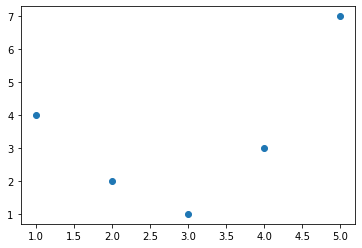

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

####  <span style = "color:red">Código Original.</span>
<!---
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);
-->

#### Podemos adotar a classe de funções [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) e tentar descrever os pontos acima com uma o auxílio das funções [`LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) para a regressão linear e [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) para o ajuste linear do modelo. Observe os resultados.

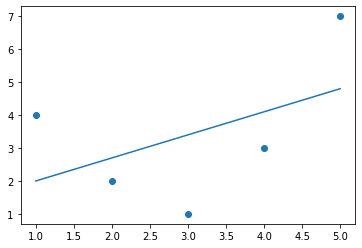

In [55]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);
-->

#### Para poder explicar corretamente esses dados, precisamos de um modelo mais sofisticado, que descreva a relação entre `x` e `y`.

#### Uma aproximação é transformar os dados, agregando colunas extras de atributos para dar mais flexibilidade ao modelo. Por exemplo, podemos criar atributos polinômicos aos dados, usaremos aqui a classe de funções [`sklearn.preprocessing.PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) e a função [`PolynomialFeatures()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) para definir o número de graus que flexibilizarã nosso modelo. Vamos observar os parâmetros `degree = 3, include_bias = False` e fazer uso do método [`.fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform) para realizar e fit e a transformação nos dados.

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, 
                          include_bias = False
                         )
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = False)
X2 = poly.fit_transform(X)
print(X2)
-->

#### A matriz derivada de atributos tem uma coluna representando `x`, uma segunda coluna representando `x` ao quadrado $x**2$ e uma terceira coluna, representando `x` ao cubo `x**3`. Computar uma regressão linear base expandida nos dá um ajuste muito mais próximo aos dados.

#### Vamos criar um [modelo](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) a partir da aplicação da função [`LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) a partir da classe [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit).

#### Vamos também aplicar a função [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) para realizar a prevsão dos pontos.

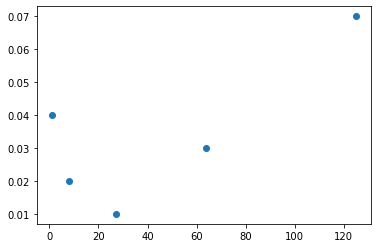

In [63]:
plt.scatter(x**3, y/100)

In [81]:
b = [1, 492, 4, 5, 6]
c= pd.array(b)

In [82]:
x

array([1, 2, 3, 4, 5])

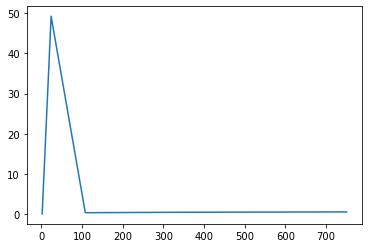

In [83]:
plt.plot(x**4 + x**3, c/10)

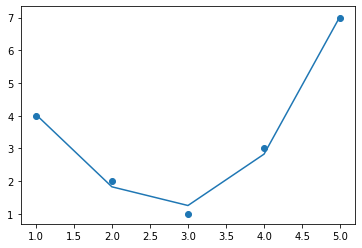

In [57]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

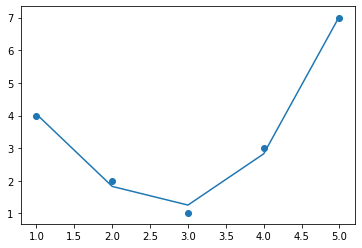

In [27]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

####  <span style = "color:red">Código Original.</span>
<!---
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);
-->

#### A ideia é melhorar uma solução, não mudando o modelo, mas transformando os valores de entrada, isso é fundamental para muitos dos métodos mais poderosos de aprendizado de máquina.

## Trabalhando com dados faltantes.

#### Outra necessidade comum em feature engineering é o manejo de dados faltantes, Por exemplo, podeíamos ter um `dataset` como o mostrado a seguir.

#### Vamos importar o pacote `nan` da biblioteca `numpy` e crie um arranjo  `X` de dimensões  `(5, 3)` e um arranjo `y` de dimensões `(1, 5)`.

In [28]:
from numpy import nan

X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])

y = np.array([14, 16, -1,  8, -5])
print(X)
print(y)

[[nan  0.  3.]
 [ 3.  7.  9.]
 [ 3.  5.  2.]
 [ 4. nan  6.]
 [ 8.  8.  1.]]
[14 16 -1  8 -5]


####  <span style = "color:red">Código Original.</span>
<!---
from numpy import nan

X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])

y = np.array([14, 16, -1,  8, -5])
print(X)
print(y)
-->

#### Para aplicar um modelo de machine learning a esses dados, primeiro devemos substituir os dados faltantes com algum valor apropriado. Isto é conhecido como ["imputação de dados faltantes"](https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/#:~:text=Most%20machine%20learning%20algorithms%20require,and%20column%20in%20a%20dataset.&text=As%20such%2C%20it%20is%20common,imputing%2C%20or%20missing%20data%20imputation.) e as estratégias vão desde a simples substituição pela média da coluna até métodos mais sofisticados.

#### Como um exemplo simples de imputação de dados, vamos usar a média, o Scikit-Learn fornece a classe [`sklearn.impute.SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

#### Podemos criar um objeto para conter a estratégia de imputação de dados faltantes a ser aplicada no objeto `X`, criado na célula anterior. Use a função  [`SimpleImputer()`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#examples-using-sklearn-impute-simpleimputer) para realizar a tarefa imputação para completar valores ausentes. observe o parâmetro de estratégia de imputação `strategy = 'mean'`.

#### Aplique também o método [`.fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform) para realizar e fit e a transformação nos dados.

In [29]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'mean')
X2 = imp.fit_transform(X)
X2
-->

## Pipelines.

#### Se queremos criar uma seqüência de transformações, pode ser tedioso fazê-lo manualmente. Podemos querer criar uma seqüência como essa:

1. Imputar valores perdidos usando a média.
2. Transformar features para valores quadráticos.
3. Ajustar uma regressão linear.

#### Para organizar esse tipo de [`pipeline`](https://towardsdatascience.com/architecting-a-machine-learning-pipeline-a847f094d1c7) de procesamiento a biblioteca Scikit-Learn provê a classe de funções [`sklearn.pipeline.make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html).

#### Vamos usar a função [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) para construir um pipeline a partir dos estimadores fornecidos.

#### Em um `pipeline` você pode arquitetar a execução das funções [`SimpleImputer()`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#examples-using-sklearn-impute-simpleimputer), [`PolynomialFeatures()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) e `LinearRegression()`, em seqüência.

In [30]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy = 'mean'),
                      PolynomialFeatures(degree = 2),
                      LinearRegression()
                     )

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy = 'mean'),
                      PolynomialFeatures(degree = 2),
                      LinearRegression()
                     )
-->

#### Esse `pipeline` se comporta como um objeto padrão de Scikit-Learn, e aplicará todos os passos especificados a qualquer dado de entrada.

#### X contém valores faltantes e o primeiro passo do `pipeline` é imputar a média.

#### Por fim você pode imprimir na tela os dados de `y` e o modelo previsto para  `X`, com o método   [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) para realizar a prevsão dos pontos.

In [31]:
model.fit(X, y)  
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


####  <span style = "color:red">Código Original.</span>
<!---
model.fit(X, y)  
print(y)
print(model.predict(X))
-->


####  <span style = "color:blue">Código Original.</span>
<!---
[``]()
-->
